In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy

In [1]:
#for reece: C:\Users\eneto\Documents\GitHub\ASTR19-TidalReport\ASTR19_S22_group_project_data.txt
#for emma: "C:\Users\emmag\Documents\astro 19\ASTR19_S22_group_project_data.txt"
with open(r"C:\Users\emmag\Documents\astro 19\ASTR19_S22_group_project_data.txt") as file:
    data = file.read()

In [3]:
def parse_tide_data(data):
    rows = []
    for line in data.split('\n'):
        parts = line.split()
        if len(parts) == 3:
            day, time, height = parts
            rows.append({'Day': int(day), 'Time': time, 'Tide Height (feet)': float(height)})
    return pd.DataFrame(rows)

In [4]:
df = parse_tide_data(data)
print(df['Time'])

0      8:07
1     15:37
2      8:55
3     16:25
4      9:45
      ...  
77    11:15
78     4:29
79    12:22
80     5:21
81    13:14
Name: Time, Length: 82, dtype: object


In [5]:
from scipy import optimize
from scipy.optimize import curve_fit

In [92]:
# function that we have to fit the parameters to
def oscillatory_function(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

def oscillatory_function_2(x, a1, b1, c1, d1, a2, b2, c2, d2):
    return a1*np.sin(b1*x+c1)+d1 + a2*np.sin(b2*x+c2)+d2

def oscillatory_function_3(x, a1, b1, c1, d1, a2, b2, c2, d2, a3, b3, c3, d3):
    return a1*np.sin(b1*x+c1)+d1 + a2*np.sin(b2*x+c2)+d2 + a3*np.sin(b3*x+c3)+d3
    

In [93]:
# converting time and hours to a decimal point
def time_to_hours(t):
    hours, minutes = map(int, t.split(':'))
    return hours + minutes / 60
df['Time (Hours)'] = df['Time'].apply(time_to_hours)
# creating a standardized timestamp that can be plotted on the x-axis
df['Timepoint'] = df['Day'] + df['Time (Hours)'] / 24

In [94]:
# initial guesses for the parameters in the oscillatory func, these will be updated by the curve_fit function
initial_guess = [5, 0.5, 0, 0]
second_guess = [5, 0.5, 0, 0,   5, 2*np.pi, 1, 0]
third_guess = [5, 0.5, 0, 0,   5, 2*np.pi, 1, 0,  1, 0.3*np.pi, 1*np.pi, 0]

In [96]:
params, params_cov = optimize.curve_fit(oscillatory_function, df['Timepoint'], df['Tide Height (feet)'],
                      sigma=np.full(len(df), 0.25),p0=initial_guess)

params2, params2_cov = optimize.curve_fit(oscillatory_function_2, df['Timepoint'], df['Tide Height (feet)'],
                      sigma=np.full(len(df), 0.25),p0=second_guess)

params3, params3_cov = optimize.curve_fit(oscillatory_function_2, df['Timepoint'], df['Tide Height (feet)'],
                      sigma=np.full(len(df), 0.25),p0=second_guess)

firstfit = oscillatory_function(df['Timepoint'], *params)
secondfit = oscillatory_function_2(df['Timepoint'], *params2)
thirdfit = oscillatory_function_2(df['Timepoint'], *params3)

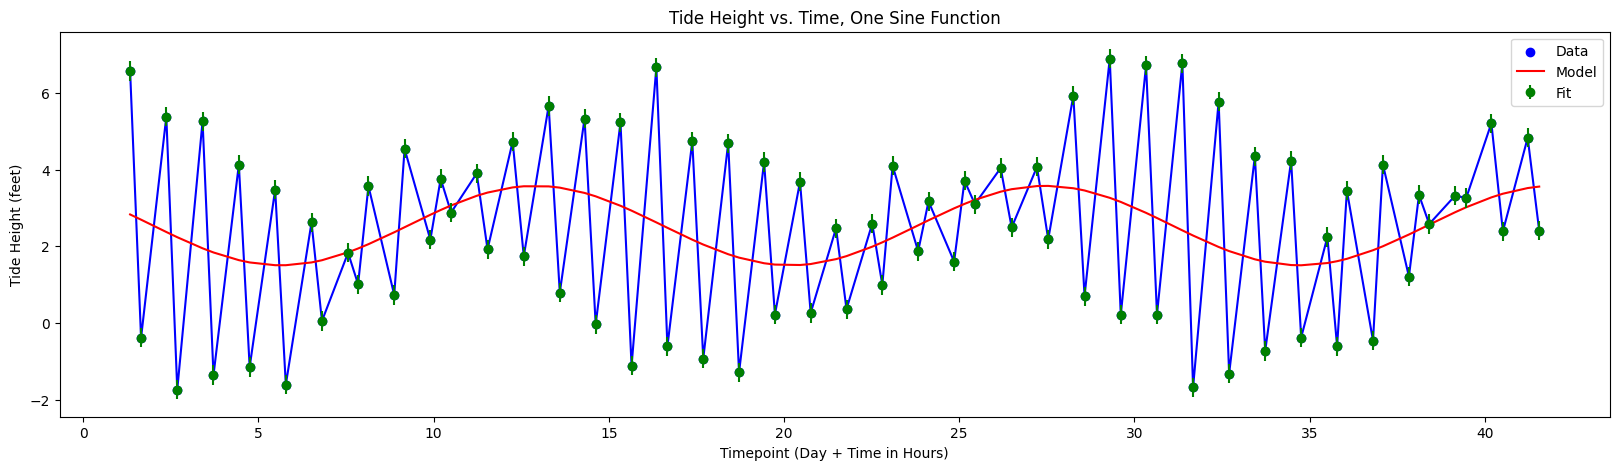

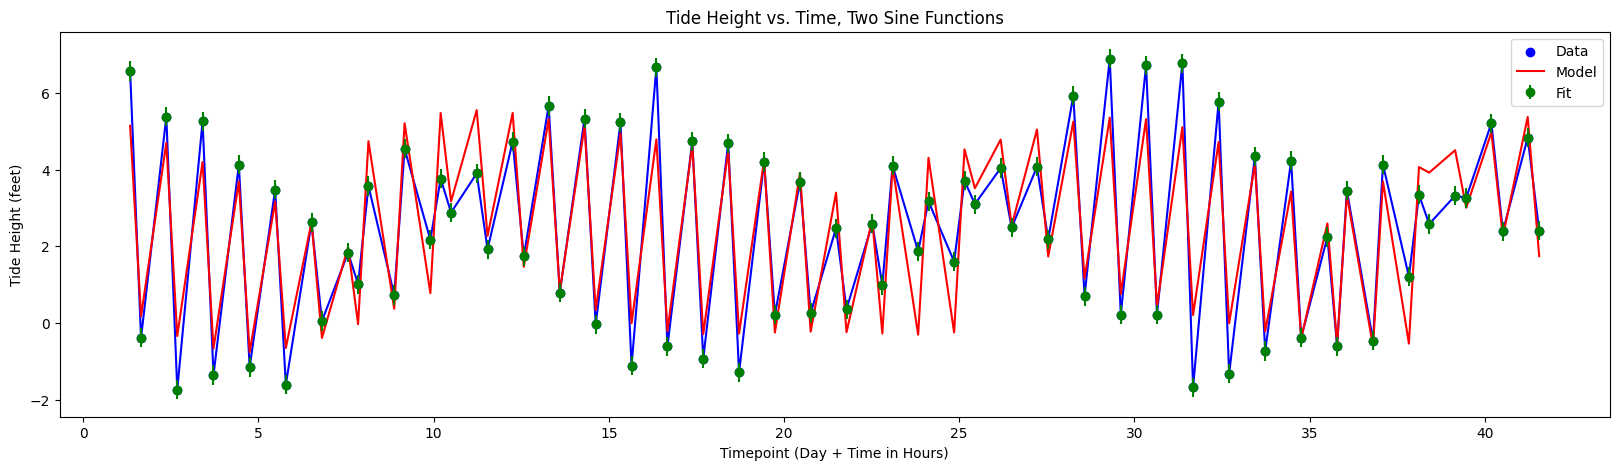

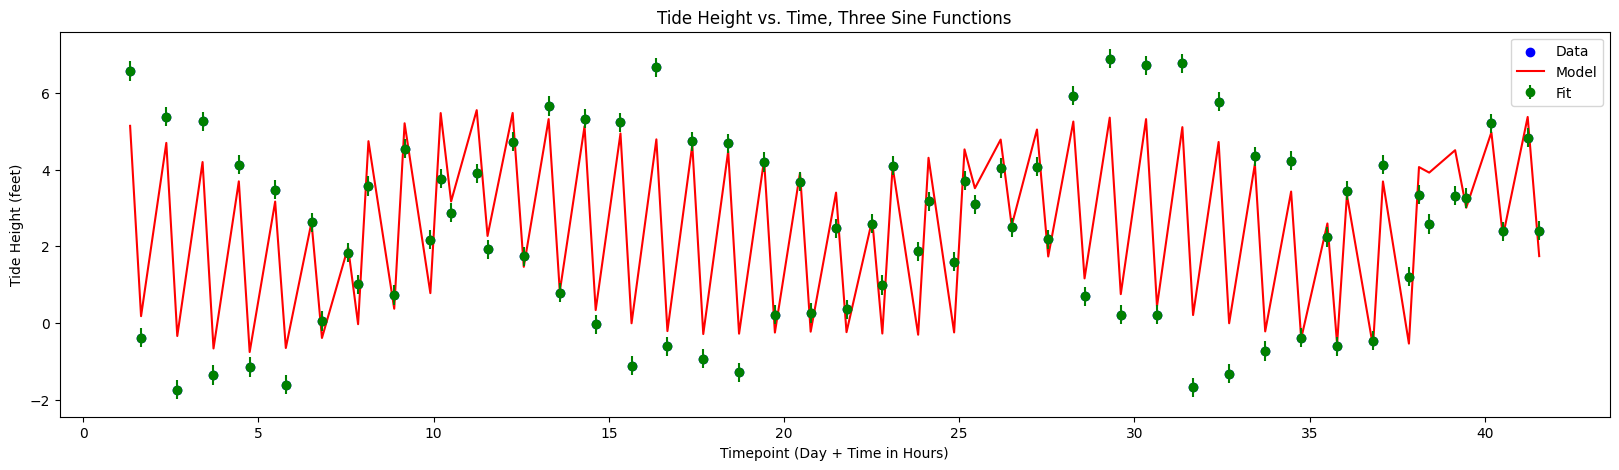

In [100]:
y_err=np.full(82,.25)
plt.figure(figsize=(20, 5))
plt.scatter(df['Timepoint'], df['Tide Height (feet)'], label='Data', color='blue')
plt.plot(df['Timepoint'], df['Tide Height (feet)'], color='blue') #shows what the fit should be modeled after, remove after fit is fixed
plt.plot(df['Timepoint'], firstfit, label='Model', color='red') 
plt.errorbar(df['Timepoint'], df['Tide Height (feet)'],yerr=y_err,fmt='o', label='Fit', color='green')

plt.xlabel('Timepoint (Day + Time in Hours)')
plt.ylabel('Tide Height (feet)')
plt.title('Tide Height vs. Time, One Sine Function')
plt.legend()

y_err=np.full(82,.25)
plt.figure(figsize=(20, 5))
plt.scatter(df['Timepoint'], df['Tide Height (feet)'], label='Data', color='blue')
plt.plot(df['Timepoint'], df['Tide Height (feet)'], color='blue') #shows what the fit should be modeled after, remove after fit is fixed
plt.plot(df['Timepoint'], secondfit, label='Model', color='red') 
plt.errorbar(df['Timepoint'], df['Tide Height (feet)'],yerr=y_err,fmt='o', label='Fit', color='green')

plt.xlabel('Timepoint (Day + Time in Hours)')
plt.ylabel('Tide Height (feet)')
plt.title('Tide Height vs. Time, Two Sine Functions')
plt.legend()

y_err=np.full(82,.25)
plt.figure(figsize=(20, 5))
plt.scatter(df['Timepoint'], df['Tide Height (feet)'], label='Data', color='blue')
#plt.plot(df['Timepoint'], df['Tide Height (feet)'], color='blue') #shows what the fit should be modeled after, remove after fit is fixed
plt.plot(df['Timepoint'], thirdfit, label='Model', color='red') 
plt.errorbar(df['Timepoint'], df['Tide Height (feet)'],yerr=y_err,fmt='o', label='Fit', color='green')

plt.xlabel('Timepoint (Day + Time in Hours)')
plt.ylabel('Tide Height (feet)')
plt.title('Tide Height vs. Time, Three Sine Functions')
plt.legend()

Okay, it seems like two sine functions are the way to go.

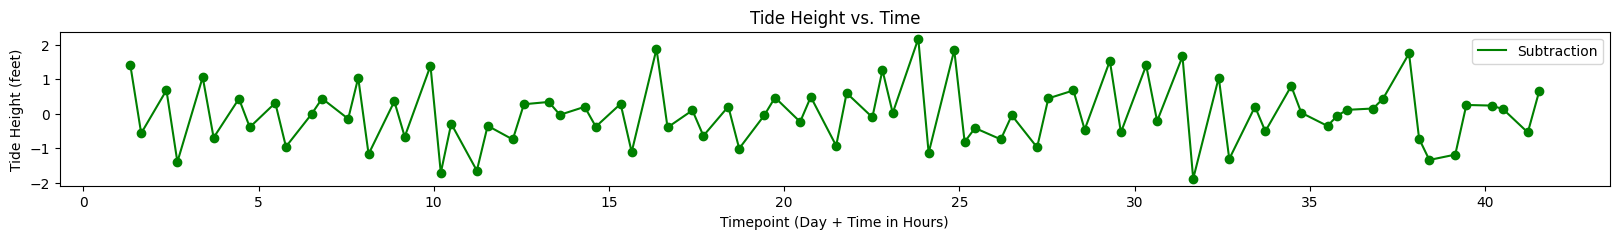

In [99]:
sub = df['Tide Height (feet)']-secondfit #can subtract once firstfit is fixed
plt.figure(figsize=(20,2))
plt.scatter(df['Timepoint'],sub,color="green")
plt.plot(df['Timepoint'],sub,label='Subtraction',color="green")
plt.xlabel('Timepoint (Day + Time in Hours)')
plt.ylabel('Tide Height (feet)')
plt.title('Tide Height vs. Time')
plt.legend()

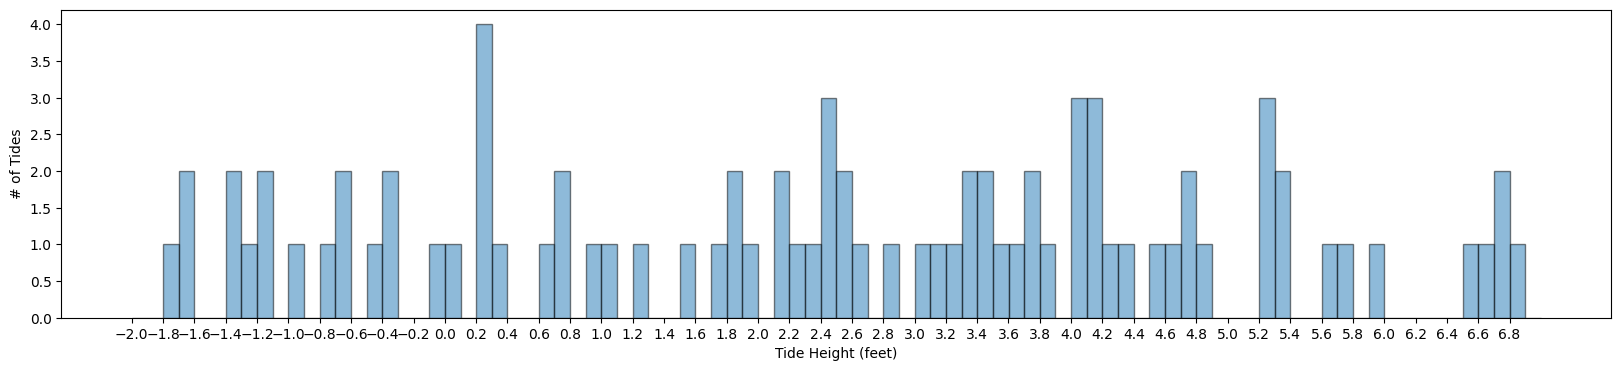

In [76]:
#note: don't worry about this, it's a work in progress; i'll do more in like 12 hours
plt.figure(figsize=(20,4))
width=.1
histmin=np.floor(min(df['Tide Height (feet)']))
histmax=np.ceil(max(df['Tide Height (feet)']))+width
bins=np.arange(histmin,histmax,width)
plt.hist(df['Tide Height (feet)'],bins=bins,alpha=.5,edgecolor='black')
plt.ylabel('# of Tides')
plt.xlabel('Tide Height (feet)')
plt.xticks(ticks=(np.arange(-2,7,.2)))
plt.savefig('hist.png',bbox_inches='tight',dpi=600)

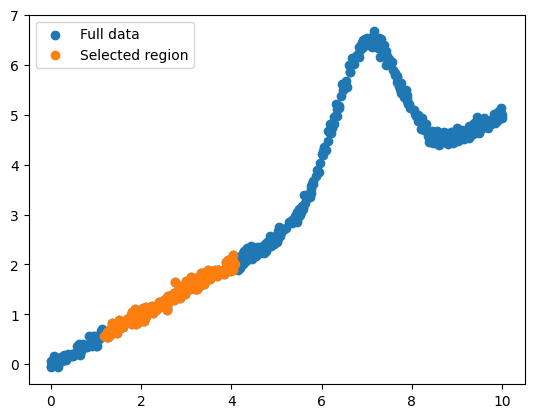

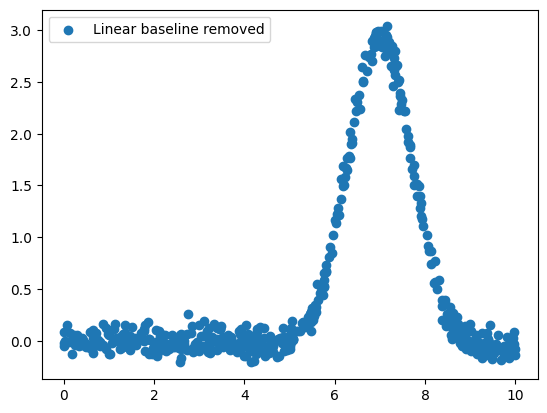

In [15]:
#note: this too, i was trying to figure it all out
#use after subtracting best fit
DATA_SIZE = 500
μ_X = np.sort(np.random.uniform(0,10,DATA_SIZE))
μ_Y = 3*np.exp(-(μ_X-7)**2) + np.random.normal(0,0.08,DATA_SIZE) + 0.5*μ_X

X = μ_X[50:200]
Y = μ_Y[50:200]

plt.scatter(μ_X, μ_Y, label='Full data')
plt.scatter(X, Y, label='Selected region')
plt.legend()
plt.show()

fit = np.polyfit(X, Y, 1)
linear_baseline = np.poly1d(fit) # create the linear baseline function
μ_Y = μ_Y - linear_baseline(μ_X) # subtract the baseline from μ_Y

plt.scatter(μ_X, μ_Y, label='Linear baseline removed')
plt.legend()
plt.show()

In [851]:
np.std(df['Tide Height (feet)'])

2.38064082624931